<h1> Clustering

Zofia Jankowska

K-means clustering - example 1

In [53]:
from sklearn.datasets import make_blobs 
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [54]:
X, y= make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)

In [55]:
X.shape

(120, 2)

In [56]:
y.shape

(120,)

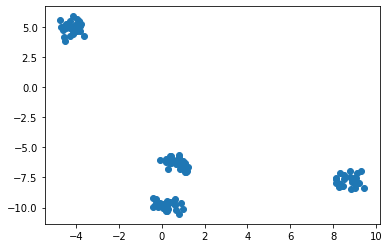

In [57]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])

In [58]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(init='random', n_clusters=4)
kmeans_1.fit(X,y)
res = kmeans_1.predict(X)
centroids = kmeans_1.cluster_centers_



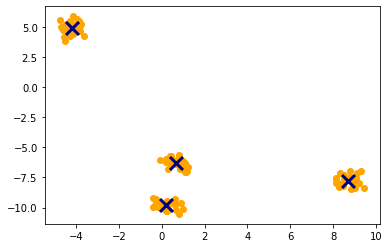

In [59]:
plt.scatter(X[:,0], X[:,1], color="orange")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="navy", zorder=10)

In [60]:
kmeans_1.inertia_

33.500096816934644

##### Example 2

In [61]:
X, y= make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

Text(0.5, 1.0, '5 clusters predicted')

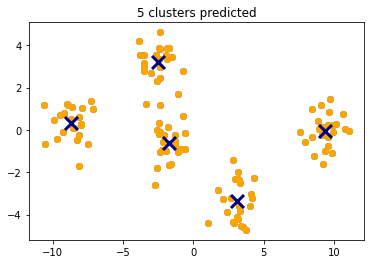

In [62]:
kmeans_2 = KMeans(init='random', n_clusters=5)
kmeans_2.fit(X,y)
res = kmeans_2.predict(X)
centroids = kmeans_2.cluster_centers_

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1], color="orange")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="navy", zorder=10)
plt.title('5 clusters predicted')


In [63]:
kmeans_2.inertia_

156.16179425537237

Text(0.5, 1.0, '2 clusters predicted')

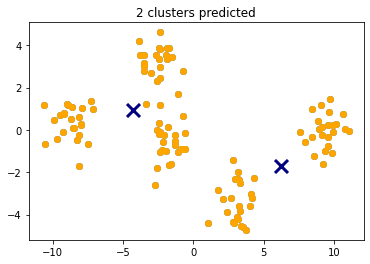

In [64]:
kmeans_3 = KMeans(init='random', n_clusters=2)
kmeans_3.fit(X,y)
res = kmeans_3.predict(X)
centroids = kmeans_3.cluster_centers_

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1], color="orange")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="navy", zorder=10)
plt.title('2 clusters predicted')

In [65]:
kmeans_3.inertia_

1653.9181130297125

##### K-means++

Text(0.5, 1.0, '2 clusters predicted')

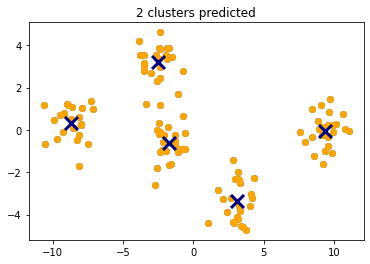

In [66]:
kmeans_4 = KMeans(init='k-means++', n_clusters=5)
kmeans_4.fit(X,y)
res = kmeans_4.predict(X)
centroids = kmeans_4.cluster_centers_

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1], color="orange")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="navy", zorder=10)
plt.title('2 clusters predicted')

##### Elbow Method

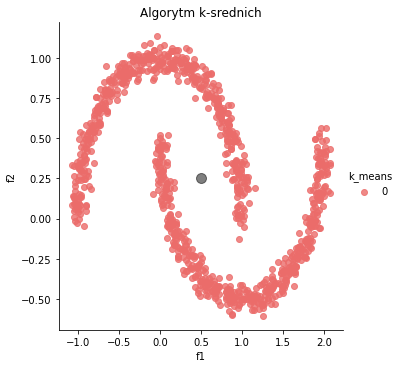

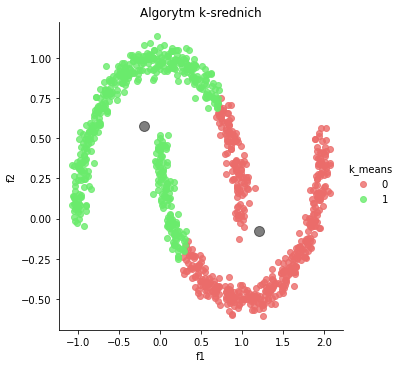

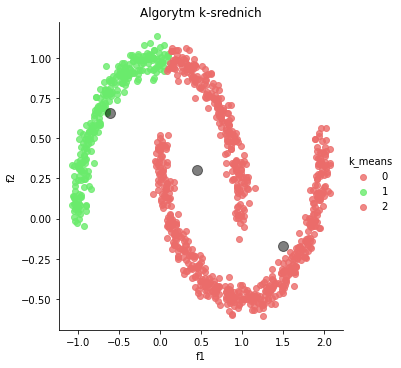

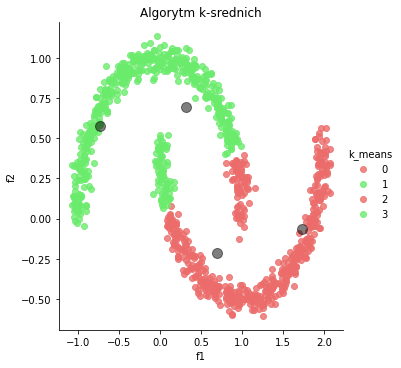

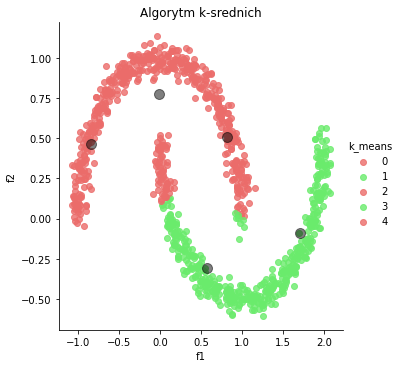

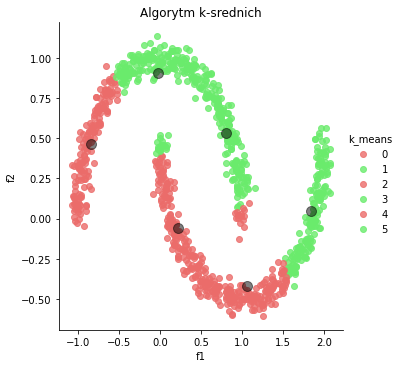

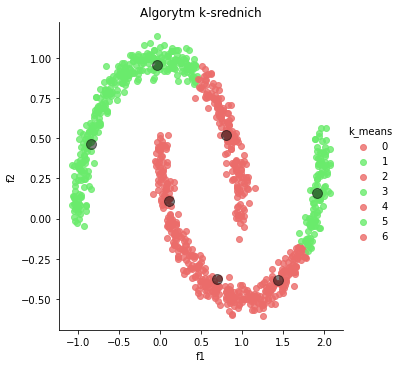

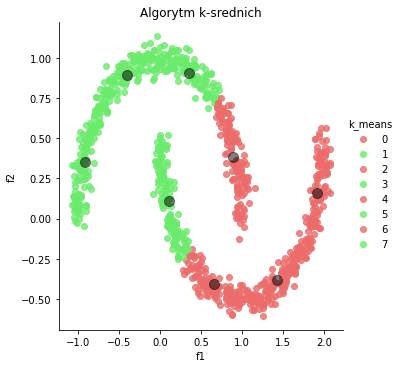

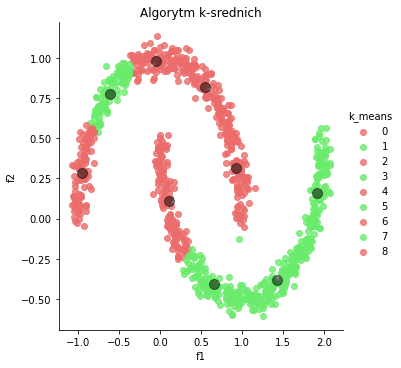

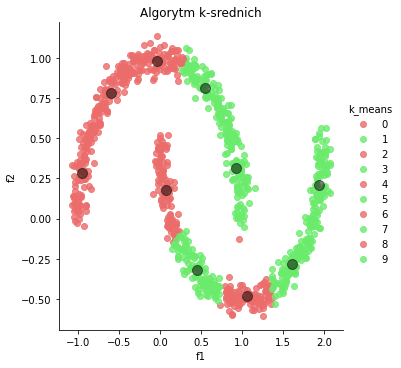

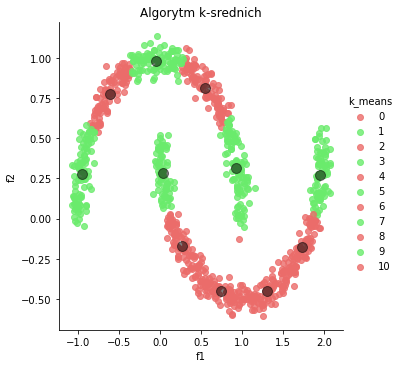

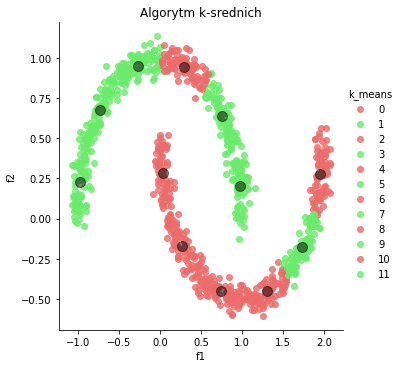

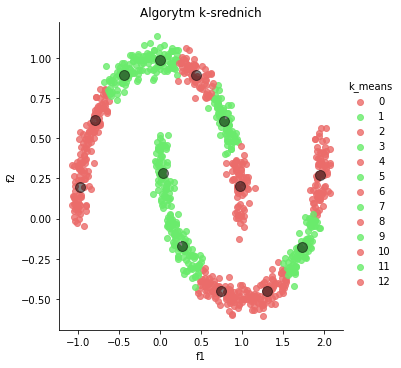

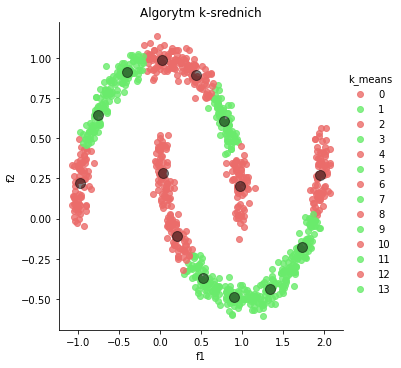

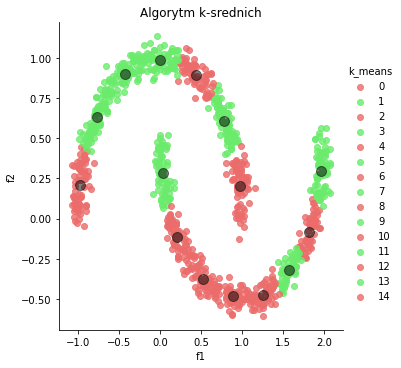

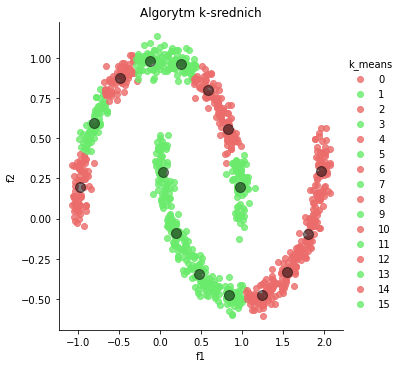

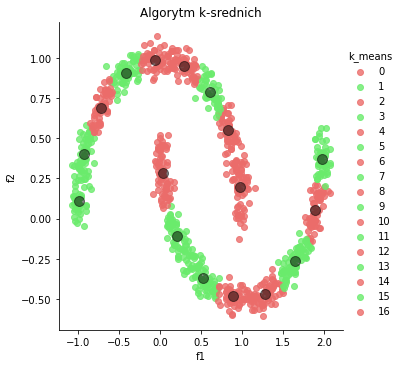

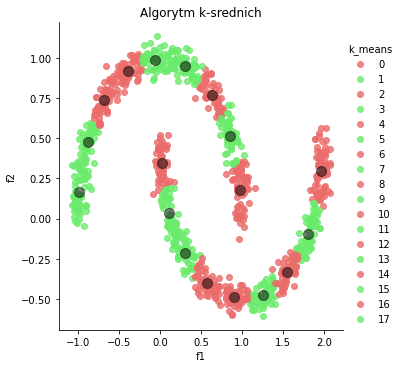

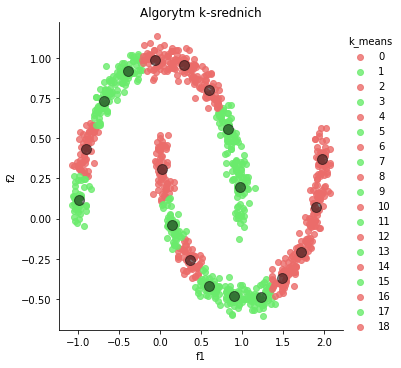

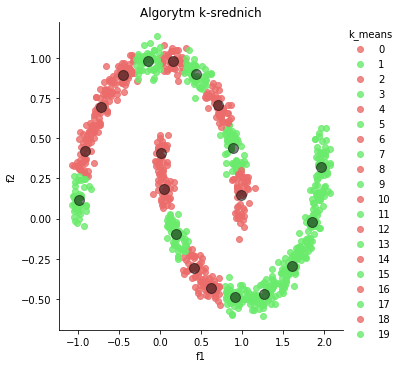

In [67]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
for clust in range (1,21):
    x, y = make_moons(1000, noise=.05, random_state=0)
    X_moon = pd.DataFrame(x, columns = ['f1','f2'])
    kmeans_5 = KMeans(init='k-means++', n_clusters=clust)
    kmeans_5.fit(x,y)
    y_km = kmeans_5.predict(x)
    centers = kmeans_5.cluster_centers_
    
    #Plot
    X_moon['k_means'] = y_km
    sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
    plt.show()

The data is correctly clustered starting from 6 clusters.

##### Clustering II

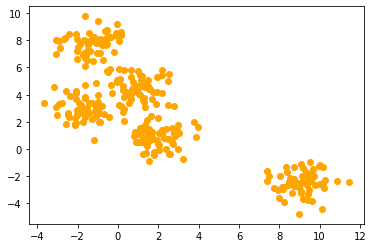

In [68]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)
plt.scatter(X[:,0], X[:,1], color="orange")

Text(0.5, 1.0, '2 clusters predicted')

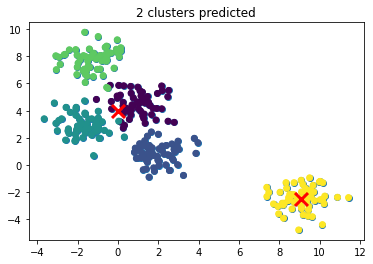

In [69]:
kmeans_5 = KMeans(init='k-means++', n_clusters=2)
kmeans_5.fit(X,y)
res = kmeans_5.predict(X)
centroids = kmeans_5.cluster_centers_

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="red", zorder=10)
plt.title('2 clusters predicted')

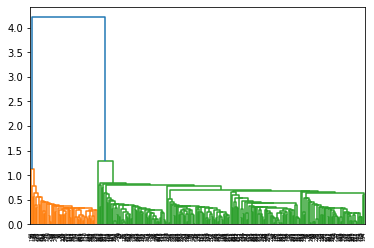

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage

lnk = linkage(X)
dnd = dendrogram(lnk)

Visualizing the dendrogram for a smaller dataset

Text(0.5, 1.0, '2 clusters predicted')

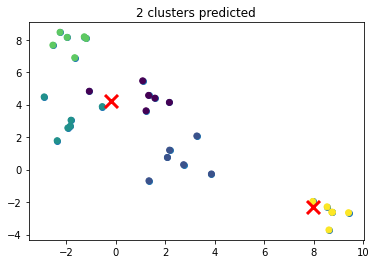

In [71]:
X, y_true = make_blobs(n_samples=30, centers=5, cluster_std=0.8, random_state=0)
kmeans_5 = KMeans(init='k-means++', n_clusters=2)
kmeans_5.fit(X,y)
res = kmeans_5.predict(X)
centroids = kmeans_5.cluster_centers_

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="red", zorder=10)
plt.title('2 clusters predicted')

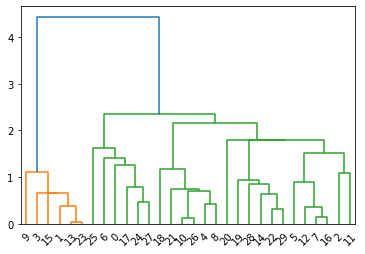

In [72]:
lnk = linkage(X)
dnd = dendrogram(lnk)

Agglomerative clustering

In [73]:
import pandas as pd

data = pd.read_csv("shopping_data.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
X = data[["Annual Income (k$)","Spending Score (1-100)"]]

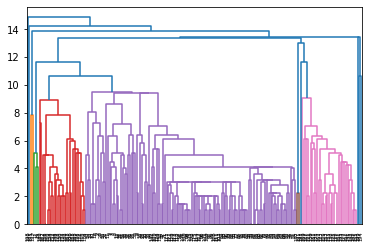

In [75]:
lnk = linkage(X, method='single')
dnd = dendrogram(lnk)

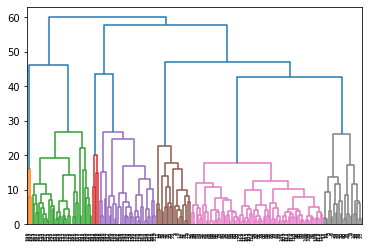

In [76]:
lnk = linkage(X, method='average')
dnd = dendrogram(lnk)

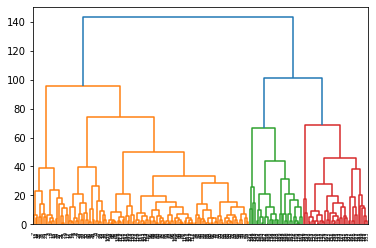

In [77]:
lnk = linkage(X, method='complete')
dnd = dendrogram(lnk)

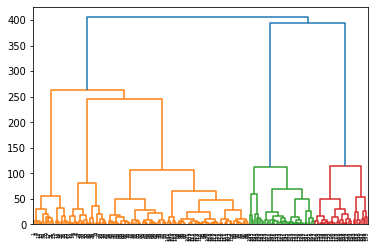

In [78]:
lnk = linkage(X, method='ward')
dnd = dendrogram(lnk)

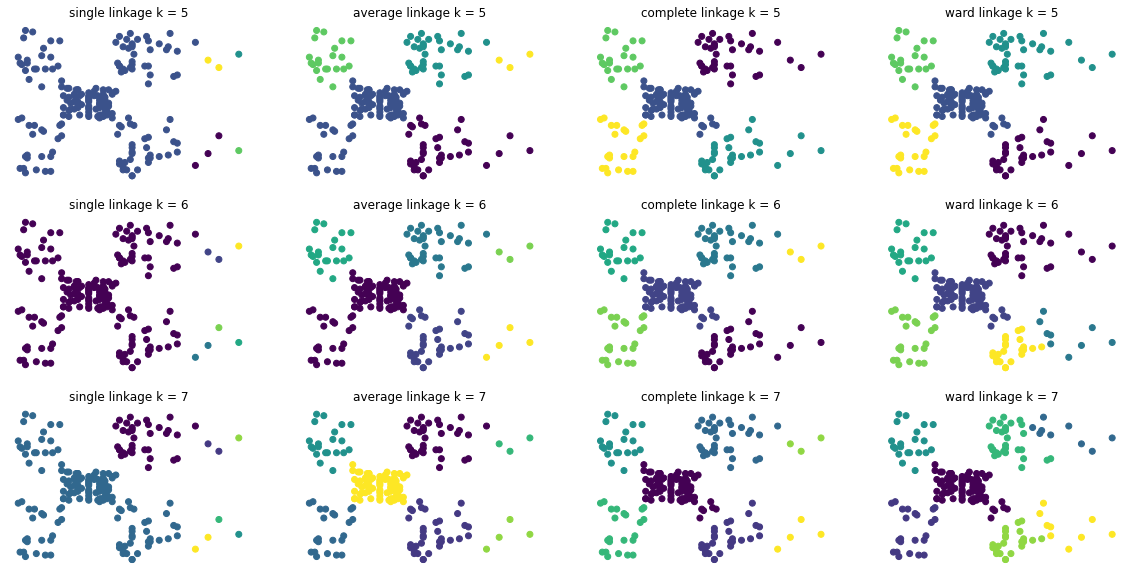

In [79]:
from sklearn.cluster import AgglomerativeClustering
import time
import numpy as np

clustering_algorithms = (('Single Linkage', "single"), ('Average Linkage', "average"), ('Complete Linkage', "complete"),('Ward Linkage', "ward"))

X = np.array(X)
plt.figure(figsize=(20, 10))
i = 1

for k in range(5, 8):
    for linkage in ['single', 'average', 'complete', 'ward']:
        alg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        alg.fit(X)
        plt.subplot(3, 4, i)
        plt.title(linkage + " linkage k = " + str(k))
        plt.scatter(X[:, 0], X[:, 1], c=alg.labels_)
        plt.axis('off')
        i += 1

With given dataset, best results were achieved by ward and complete linkage for 5 clusters.

##### Selecting the number of clusters with silhouette analysis on KMeans clustering

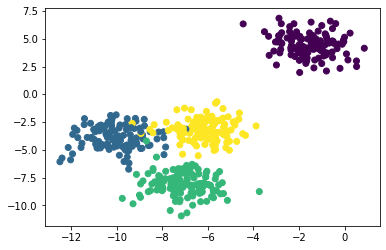

In [80]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
plt.scatter(X[:, 0], X[:, 1], c=y)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


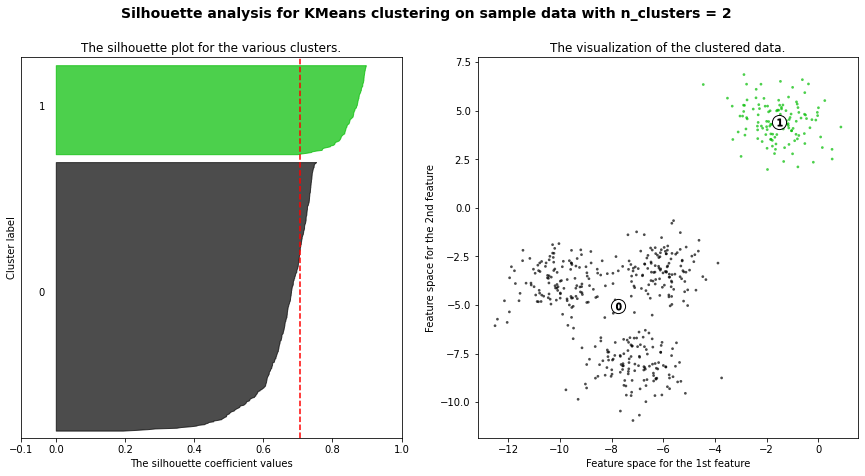

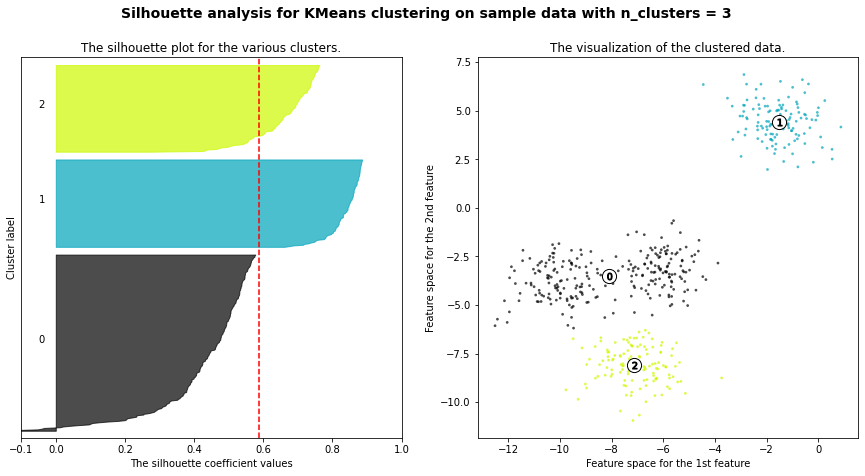

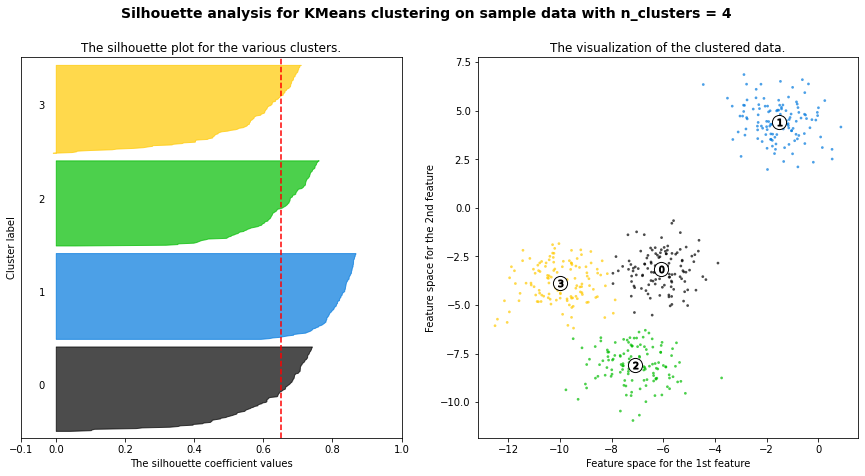

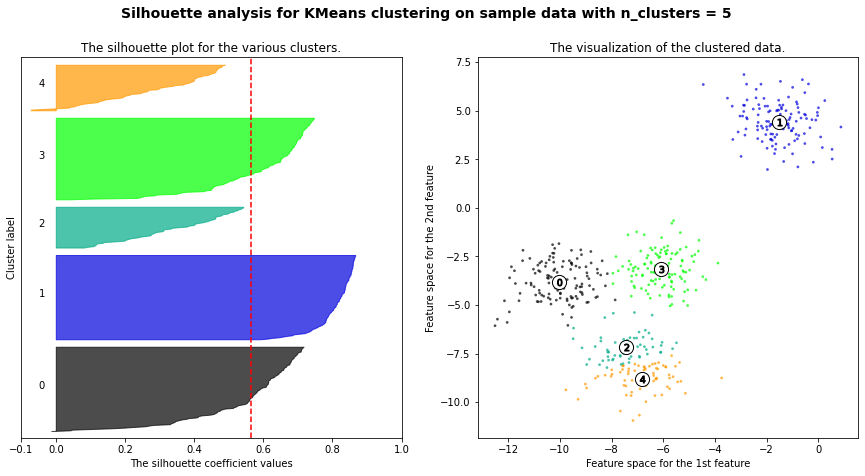

In [81]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm


for k in [2, 3, 4, 5]:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    clust = KMeans(n_clusters=k, random_state=10)
    labels = clust.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(labels.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clust.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

#### DBSCAN

In [82]:
from sklearn import  datasets
 
 
# ============
# Generate datasets.
# ============
n_samples = 1500
circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
 

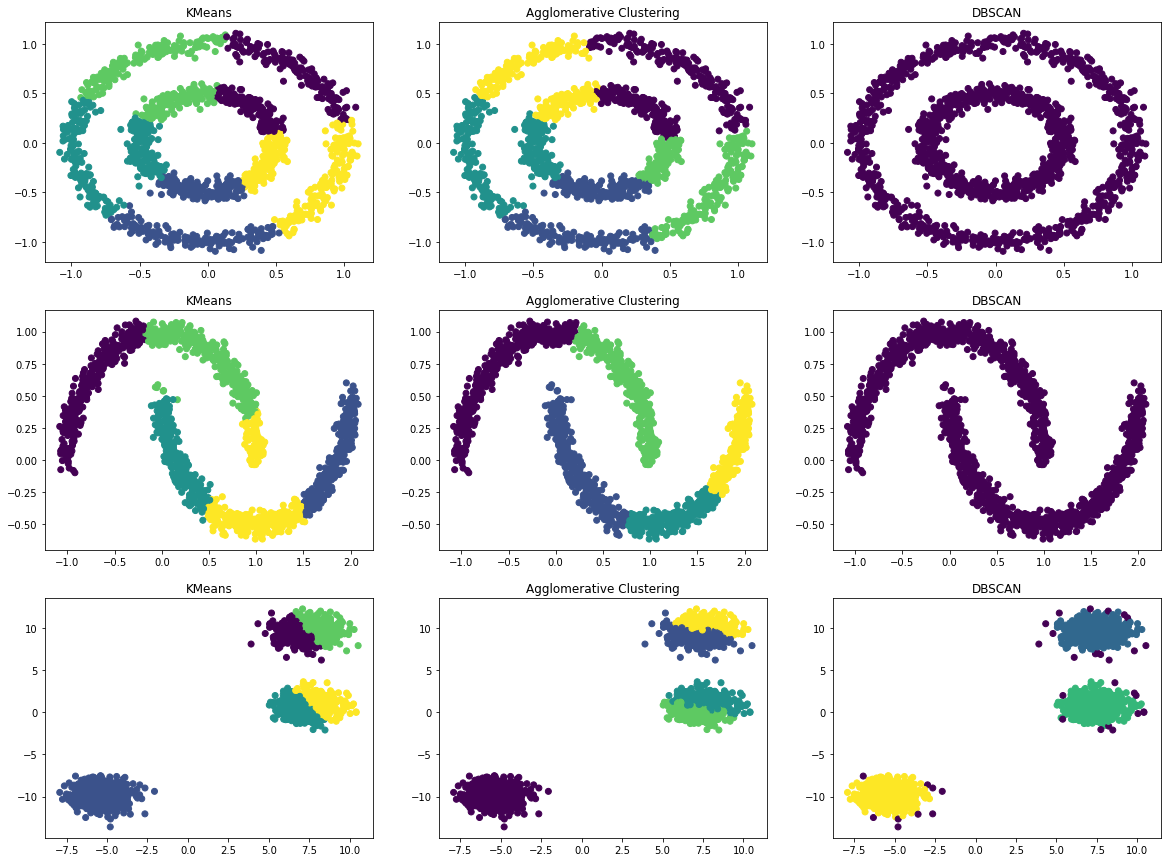

In [83]:
from sklearn.cluster import KMeans, DBSCAN

datasets = [circles, moons, blobs]
plot_num = 1
plt.figure(figsize=(20, 15))
for dataset in datasets:
    y_pred_km = KMeans(n_clusters=5).fit_predict(dataset[0], dataset[1])
    y_pred_ag = AgglomerativeClustering(n_clusters=5).fit_predict(dataset[0] ,dataset[1])
    y_pred_db = DBSCAN().fit_predict(dataset[0], dataset[1])
    
    plt.subplot(3, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_km)
    plt.title("KMeans")
    plot_num += 1
    
    plt.subplot(3, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_ag)
    plt.title("Agglomerative Clustering")
    plot_num += 1
    
    plt.subplot(3, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_db)
    plt.title("DBSCAN")
    plot_num += 1